In [1]:
'''
输入为连续值
y = w0 + w1*x1 + w2*x2 + w3*x3 + ... + wn*xn
'''

'\ny = w0 + w1*x1 + w2*x2 + w3*x3 + ... + wn*xn\n'

1 加载数据

In [2]:
import pandas as pd

In [3]:
# 加载数据
data = pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
'''
fixed acidity = 固定酸
volatile acidity = 挥发酸
citric acid = 柠檬酸
residual sugar = 残糖
chlorides = 氯化物 
free sulfur dioxide = 游离二氧化硫
total sulfur dioxide = 总二氧化硫
density = 密度 取决于 酒精 和 含糖量
pH = pH值
sulphates = 硫酸盐
alcohol = 酒精

quality = 质量 评分为1-10
'''

'\nfixed acidity = 固定酸\nvolatile acidity = 挥发酸\ncitric acid = 柠檬酸\nresidual sugar = 残糖\nchlorides = 氯化物 \nfree sulfur dioxide = 游离二氧化硫\ntotal sulfur dioxide = 总二氧化硫\ndensity = 密度 取决于 酒精 和 含糖量\npH = pH值\nsulphates = 硫酸盐\nalcohol = 酒精\n\nquality = 质量 评分为1-10\n'

2 清洗数据，缺失值，异常值

In [5]:
# 数据描述
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# 数据行列
data.shape

(1599, 12)

In [7]:
# 每一列数据类型
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

3 计算维度相关性

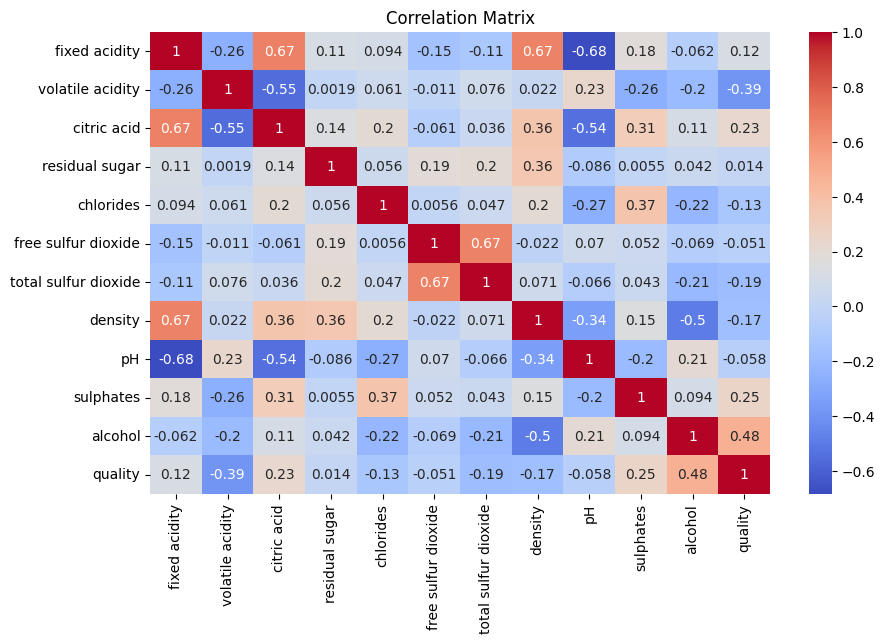

In [9]:
# 计算相关性
corr = data.corr()

# 热度图查看维度相关性
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# vif 方差膨胀因子
''' 
vif >5 说明 维度 不垂直
1 可以删除一些高度相关， 负相关的变量
2 可以降维
'''
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 排除 预测目标列
cc = data.drop(['quality'], axis=1)

# 添加 常数项 作为 截距
cc = sm.add_constant(cc)

# 计算vif
vif_data = pd.DataFrame()
vif_data["feature"] = cc.columns
vif_data["VIF"] = [variance_inflation_factor(cc.values, i) for i in range(len(cc.columns))]
vif_data.sort_values(by="VIF", ascending=True).round(3)

,feature,VIF
10,sulphates,1.429
5,chlorides,1.482
4,residual sugar,1.703
2,volatile acidity,1.789
6,free sulfur dioxide,1.963
7,total sulfur dioxide,2.187
11,alcohol,3.031
3,citric acid,3.128
9,pH,3.330
8,density,6.344


4 切分 x y

In [11]:
x = data.drop(['quality'],axis = 1) # 排除 预测目标列
y = data['quality'] # 拿到 预测目标列（使用单层方括号获取Series）

5 对输入归一化

In [12]:
from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler() # 缩放器，目标值0-1之间
scale_x = minmax_scaler.fit_transform(x) # 缩放
x = pd.DataFrame(scale_x, columns=x.columns) # array -> dataframe
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


6 拆分 训练集 测试集

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x, # 特征数据集
    y, # 标签数据集
    test_size=0.2, # 随机0.2作为测试
    random_state=0 # 随机拆分种子
)

7 训练模型

In [16]:
# 方法1 sklearn的线性回归
# 训练模型
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 实例化 线性回归模型
model = model.fit(x_train, y_train) # 拟合训练


# 查看系数
coef = pd.DataFrame(model.coef_.ravel(), index=x.columns, columns=['系数']).sort_values('系数', ascending=False)
coef

,系数
alcohol,1.740683
sulphates,1.543147
fixed acidity,0.466504
residual sugar,0.406902
free sulfur dioxide,0.190537
citric acid,-0.177927
pH,-0.323197
density,-0.429257
total sulfur dioxide,-0.786028
chlorides,-1.122171


In [17]:
# # 方法2 statsmodels的线性回归
# import statsmodels.api as sm

# # 添加 常数项 作为 截距
# new_x_train = sm.add_constant(x_train)

# # 拟合模型
# model = sm.OLS(y_train, new_x_train) # 
# model = model.fit() # 拟合
# model.summary()

In [18]:
# # 方法3 sk神经网络
# from sklearn.neural_network import MLPRegressor

# model = MLPRegressor(hidden_layer_sizes=(36,6),max_iter= 2000, verbose= True,learning_rate_init=0.005, early_stopping= True)
# model.fit(x_train,y_train)

8 评估指标

In [19]:
# 计算预测结果
y_train_pred = model.predict(x_train) # 训练集预测
y_test_pred = model.predict(x_test) # 测试集预测
print(type(y_train_pred))

<class 'numpy.ndarray'>


In [1]:
from sklearn import metrics
import numpy as np

# 多指标测试
# 平均绝对误差 MAE
'''平均误差的绝对值,越低越好'''
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
print(f'训练集平均绝对误差：{mae_train}')
print(f'测试集平均绝对误差：{mae_test}')

# 均方误差 MSE
'''让较大的误差有更高的权重，越低越好'''
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print(f'训练集均方误差：{mse_train}')
print(f'测试集均方误差：{mse_test}')

# 均方根误差 RMSE
'''让较大的误差有更高的权重，越低越好'''
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f'训练集均方根误差：{rmse_train}')
print(f'测试集均方根误差：{rmse_test}')

NameError: name 'y_train' is not defined

In [21]:
# r2_score分数
'''
0-1 
越接近1越好 

代表能够解释百分之多少的误差

'''
from sklearn import metrics
r2_sq_train = metrics.r2_score(y_train, y_train_pred)
r2_sq_test = metrics.r2_score(y_test, y_test_pred)
print(f'训练集r2_score分数：{r2_sq_train}')
print(f'测试集r2_score分数：{r2_sq_test}')

训练集r2_score分数：0.36545196162068627
测试集r2_score分数：0.32838876395802274


9 可视化

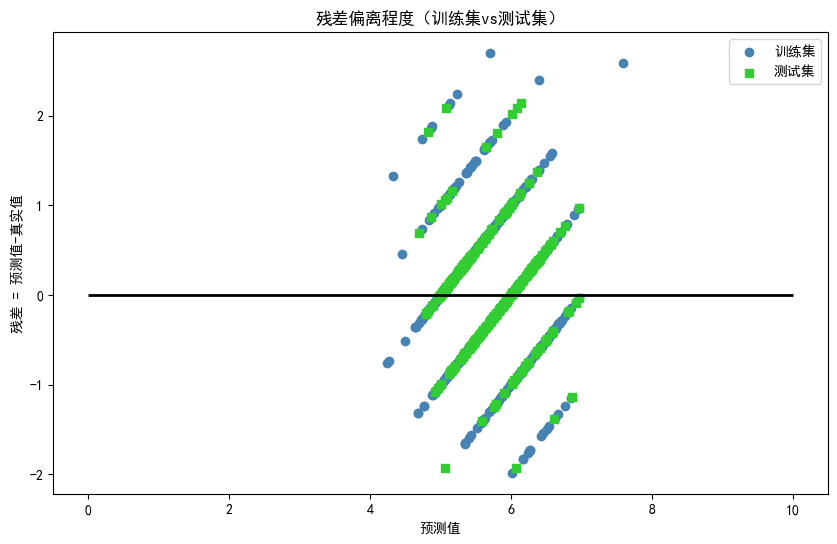

In [22]:
import matplotlib.pyplot as plt
# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


# 误差的分布情况
plt.figure(figsize=(10, 6))

plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', label='训练集')
plt.scatter(y_test_pred, y_test_pred-y_test, c='limegreen',marker = 's', label='测试集')

plt.xlabel('预测值')
plt.ylabel('残差 = 预测值-真实值')
plt.legend(loc='upper right')
plt.title('残差偏离程度（训练集vs测试集）')
plt.hlines(y=0, xmin=0, xmax=10, color='black', lw=2)
plt.show()

In [23]:
'''
理想情况 = 残差随机分配在0线附近 说明拟合较好

当前情况 = 残差规律性分布 
'''

'\n理想情况 = 残差随机分配在0线附近 说明拟合较好\n\n当前情况 = 残差规律性分布 \n'

In [24]:
# 特征重要程度分析
from sklearn.inspection import permutation_importance

results = permutation_importance(model, x_test, y_test, scoring='neg_mean_squared_error')
importance_df = pd.DataFrame(results.importances_mean, index=x.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(importance_df)

                      Importance
alcohol                 0.144327
volatile acidity        0.056233
sulphates               0.037370
total sulfur dioxide    0.016892
chlorides               0.008557
fixed acidity           0.006828
density                 0.006553
citric acid             0.004561
pH                      0.003996
free sulfur dioxide     0.002576
residual sugar         -0.001667
